In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

%matplotlib inline  

In [3]:
cols = ['event',
        'match_id',
        'team_id',
        'player',
        'timestamp',
        'pos_x',
        'pos_y',
       ]

data = pd.read_csv('match_positions_separated.csv', header=None, names=cols)
data = data[data['pos_x'] > 5000]  # this positions less than 5000 have no data

In [4]:
data[:5]

,event,match_id,team_id,player,timestamp,pos_x,pos_y
0,DOTA_STATUS_UPDATE,2500623971,2,heroalchemist,57,9453.0,9965.0
1,DOTA_COMBATLOG_PURCHASE,2500623971,2,heroalchemist,57,9453.0,9965.0
2,DOTA_COMBATLOG_PURCHASE,2500623971,2,heroalchemist,57,9453.0,9965.0
3,DOTA_STATUS_UPDATE,2500623971,2,heroalchemist,58,9661.0,10173.0
4,DOTA_COMBATLOG_PURCHASE,2500623971,2,heroalchemist,58,9661.0,10173.0


In [5]:
offset = 100
min_pos_x = min(data['pos_x']) - offset
min_pos_y = min(data['pos_y']) - offset

In [6]:
data['pos_x'] = data['pos_x'] - min_pos_x
data['pos_y'] = data['pos_y'] - min_pos_x

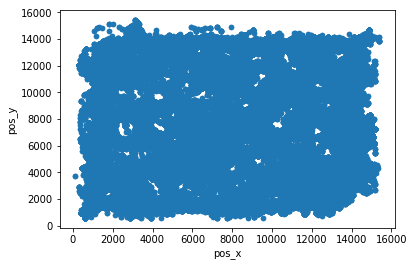

In [7]:
data.plot.scatter('pos_x', 'pos_y')

In [8]:
data['event'].unique()

array(['DOTA_STATUS_UPDATE', 'DOTA_COMBATLOG_PURCHASE',
       'DOTA_COMBATLOG_MODIFIER_REMOVE', 'DOTA_COMBATLOG_MAKE_DAMAGE',
       'DOTA_COMBATLOG_XP', 'DOTA_COMBATLOG_GOLD',
       'DOTA_COMBATLOG_GET_DAMAGE', 'DOTA_COMBATLOG_KILL',
       'DOTA_COMBATLOG_MAKE_HEAL', 'DOTA_COMBATLOG_GET_HEAL',
       'DOTA_COMBATLOG_DEATH', 'DOTA_COMBATLOG_MODIFIER_ADD'], dtype=object)

In [9]:
data['match_id'].unique()

array([2500623971, 2500632973, 2500694760, 2500724300, 2500811393,
       2500816344, 2500881491, 2500916535, 2501003221, 2501007313])

In [10]:
death_position = data[data['event'] == 'DOTA_COMBATLOG_DEATH']

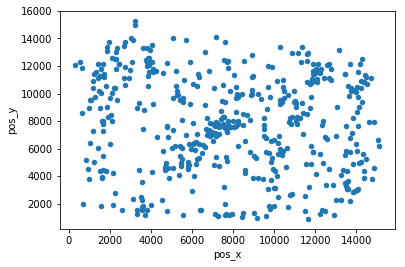

In [11]:
death_position.plot.scatter('pos_x', 'pos_y')

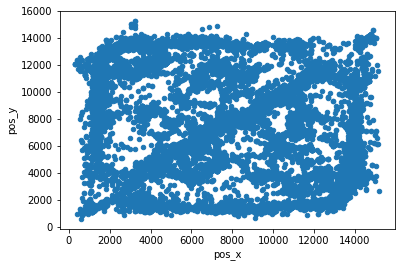

In [12]:
gold_position = data[data['event'] == 'DOTA_COMBATLOG_GOLD']
gold_position.plot.scatter('pos_x', 'pos_y')

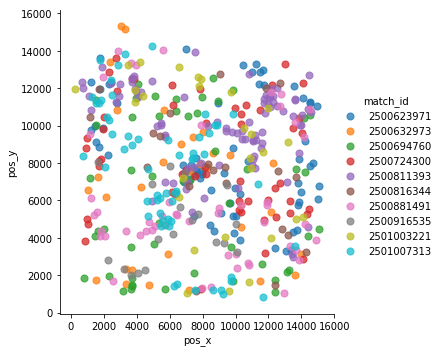

In [13]:
sns.lmplot("pos_x", "pos_y", data=death_position, hue="match_id", x_jitter=200, y_jitter=200, 
           fit_reg=False, scatter_kws={"s": 50, "alpha": 0.75}, height=5)

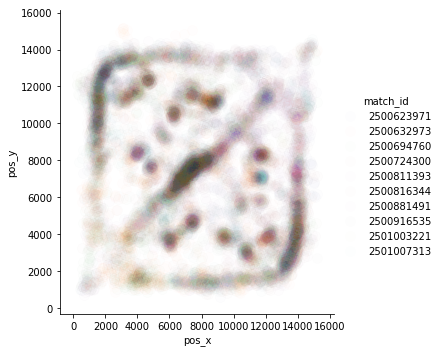

In [14]:
sns.lmplot("pos_x", "pos_y", data=shuffle(gold_position), hue="match_id", x_jitter=200, y_jitter=200,
           fit_reg=False, scatter_kws={"s": 100, "alpha": 0.0075}, height=5)

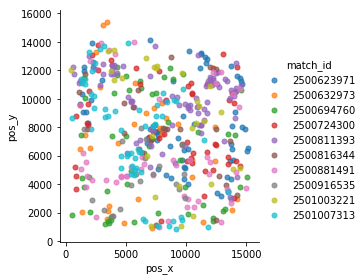

In [15]:
sns.lmplot("pos_x", "pos_y", data=shuffle(death_position), hue="match_id", x_jitter=200, y_jitter=200, 
           fit_reg=False, scatter_kws={"s": 25, "alpha": 0.75}, height=4)

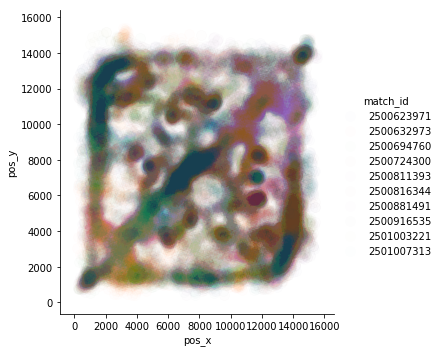

In [16]:
status_position = data[data['event'] == 'DOTA_STATUS_UPDATE']
sns.lmplot("pos_x", "pos_y", data=shuffle(status_position), hue="match_id", x_jitter=200, y_jitter=200, 
           fit_reg=False, scatter_kws={"s": 100, "alpha": 0.0075}, height=5)

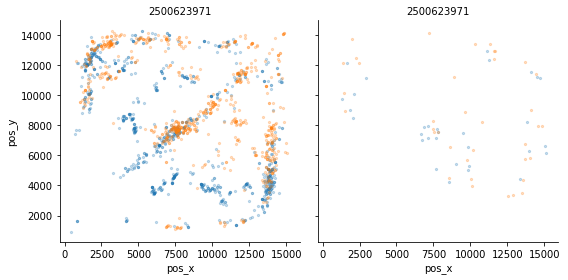

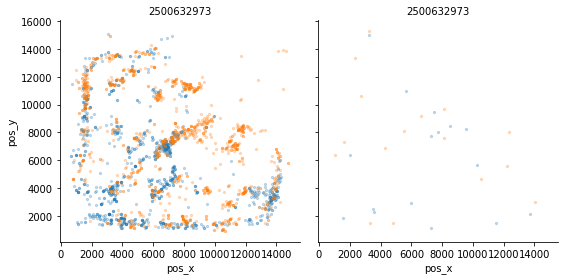

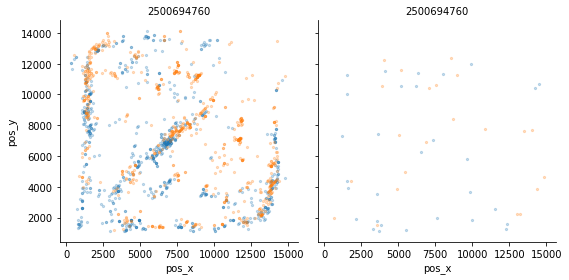

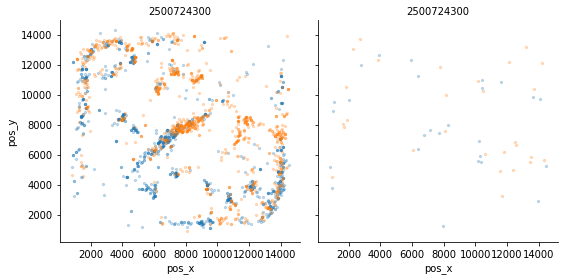

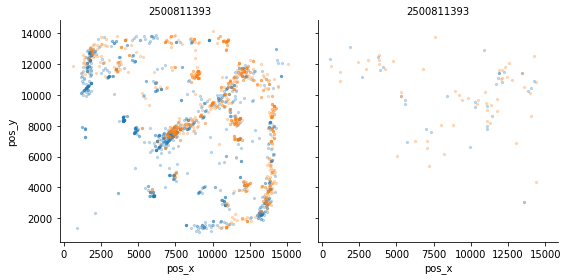

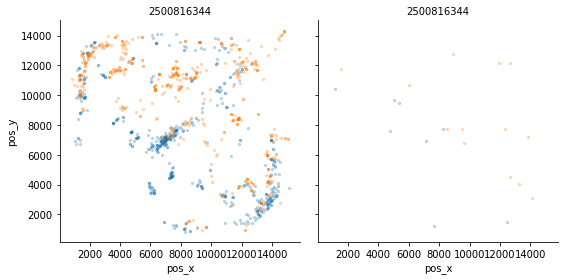

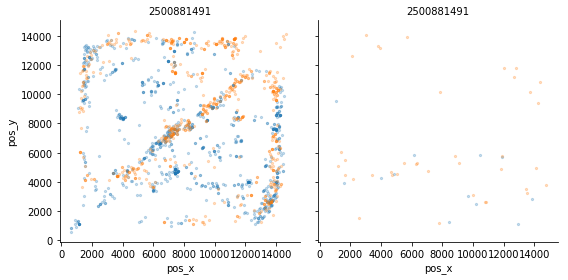

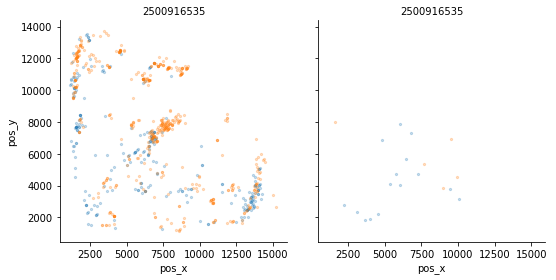

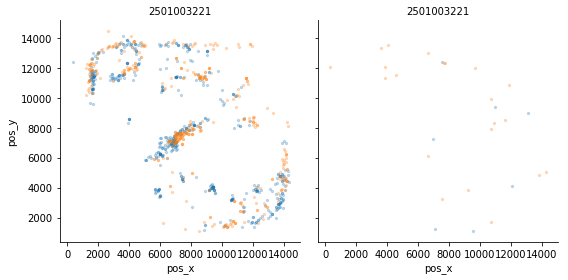

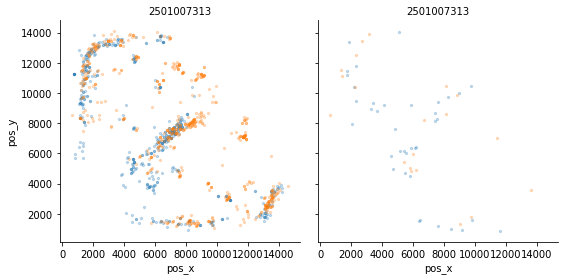

In [17]:
for m in data['match_id'].unique():
    select_data = data[(data['event']=='DOTA_COMBATLOG_KILL') | (data['event']=='DOTA_COMBATLOG_DEATH')]
    g = sns.FacetGrid(shuffle(select_data[select_data['match_id']==m]), col='event', col_wrap=2, hue='team_id', height=4)
    g = (g.map(plt.scatter, 'pos_x', 'pos_y', s=5, alpha=0.25)).set_titles(m)

### Cluster Players and Events - Single Match

- Cluster by pos_x, pos_y and timestamp
- Give weight to events (one event is more important for the cluster)
- Give more weights to points closer to weighted events
    - For example: There can be many "damage" events and one "death" event
    - The "death" event will have more weight to define cluster
    - Events that happened near to "death" event will get more weight

- A cluster can represent a "significant/complex" event (generally with "multiple" players)

- Determining the "optimal" number of cluster: 
    - try with different number of clusters
    - When to stop? - might need to look at the loss function curve

### Questions
Q. Does similar cluster for different matches represent similar events/results? Or game out-come? 

Q. Can the clusters of different matches be used to predict future events for another match? 

Q. Can we find correlations between clusters? One cluster may be a result of a previous cluster? 

Q. Can Clusters replace labeling or be an aid to labeling process? 

### Filter dataset with events

In [11]:
filtered_events = ['DOTA_COMBATLOG_XP',
                   'DOTA_COMBATLOG_GOLD',
                   'DOTA_COMBATLOG_MAKE_DAMAGE',
                   'DOTA_COMBATLOG_GET_DAMAGE',
                   'DOTA_COMBATLOG_KILL',
                   'DOTA_COMBATLOG_MAKE_HEAL',
                   'DOTA_COMBATLOG_GET_HEAL',
                   'DOTA_COMBATLOG_DEATH']

In [13]:
data_fl = data[data['event'].isin(filtered_events)]

In [21]:
data_fl.head()

,event,match_id,team_id,player,timestamp,pos_x,pos_y
10,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,131,5821.0,8637.0
11,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,131,5821.0,8637.0
13,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0
14,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0
15,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0


In [19]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=100).fit(data_fl[['timestamp', 'pos_x', 'pos_y']])

In [28]:
data_fl.loc[:, 'label'] = kmeans.labels_

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
data_fl.head()

,event,match_id,team_id,player,timestamp,pos_x,pos_y,label
10,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,131,5821.0,8637.0,70
11,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,131,5821.0,8637.0,70
13,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0,54
14,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0,54
15,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,132,5949.0,9021.0,54


In [33]:
cc = pd.DataFrame(kmeans.cluster_centers_, columns=['timestamp', 'pos_x', 'pos_y'])

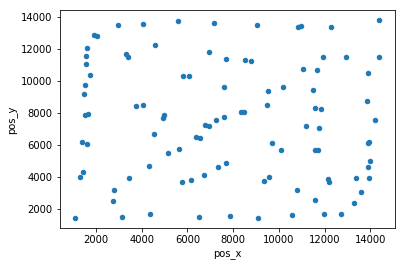

In [35]:
cc.plot.scatter('pos_x', 'pos_y')

In [36]:
data_fl.groupby(['label']).size()

label
0     1449
1     3759
2     3106
3     4143
4     7297
5     4369
6     6088
7     3548
8     2156
9     3997
10    4034
11    3516
12    3164
13    1918
14    3627
15    2293
16    2915
17    3397
18    2856
19    4238
20    1660
21    2483
22    2071
23    3616
24    2359
25    4410
26    4218
27    1767
28    2048
29    5212
      ... 
70    4907
71    2422
72    2493
73    2657
74    6568
75    5563
76    3181
77    1918
78    3260
79     780
80    2821
81    2765
82    2315
83    1990
84    4491
85    1899
86    3594
87    2405
88    4026
89    2153
90    1699
91    3032
92    4758
93    3234
94    2796
95    1997
96    3392
97    1193
98    2860
99    3673
Length: 100, dtype: int64

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


label
0     2659
1     2509
2     1760
3     3188
4     4320
5     2211
6     4764
7     1579
8     2161
9     2408
10    1271
11    3243
12    2295
13    2894
14    2335
15    3104
16    1389
17    4140
18    1927
19    4037
20    2543
21    3271
22    3404
23    3074
24    1091
25    2589
26    3060
27    2995
28    3389
29    1892
      ... 
70    1824
71    2775
72    2592
73    1946
74    2299
75    2344
76    3055
77    1442
78    1430
79    4334
80    2004
81    1761
82    2606
83    2169
84    1369
85    2548
86    2278
87    1202
88    2089
89    2504
90    1089
91    2017
92    2341
93    1621
94    2397
95    1655
96    3227
97    2826
98    1050
99    1195
Length: 100, dtype: int64

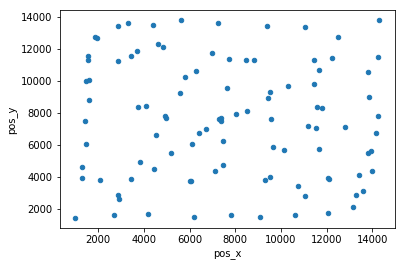

In [18]:
filtered_events = ['DOTA_COMBATLOG_MAKE_DAMAGE',
                   'DOTA_COMBATLOG_GET_DAMAGE',
                   'DOTA_COMBATLOG_KILL',
                   'DOTA_COMBATLOG_DEATH']

data_fl = data[data['event'].isin(filtered_events)]

data_fl.head()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=100).fit(data_fl[['timestamp', 'pos_x', 'pos_y']])

data_fl.loc[:, 'label'] = kmeans.labels_

data_fl.head()

cc = pd.DataFrame(kmeans.cluster_centers_, columns=['timestamp', 'pos_x', 'pos_y'])

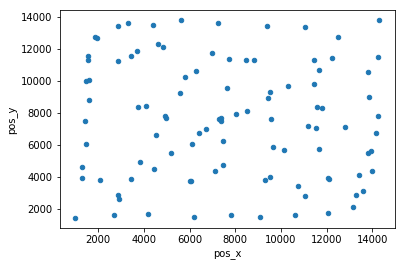

In [19]:
cc.plot.scatter('pos_x', 'pos_y')

In [20]:
data_fl.groupby(['label']).size()

label
0     2659
1     2509
2     1760
3     3188
4     4320
5     2211
6     4764
7     1579
8     2161
9     2408
10    1271
11    3243
12    2295
13    2894
14    2335
15    3104
16    1389
17    4140
18    1927
19    4037
20    2543
21    3271
22    3404
23    3074
24    1091
25    2589
26    3060
27    2995
28    3389
29    1892
      ... 
70    1824
71    2775
72    2592
73    1946
74    2299
75    2344
76    3055
77    1442
78    1430
79    4334
80    2004
81    1761
82    2606
83    2169
84    1369
85    2548
86    2278
87    1202
88    2089
89    2504
90    1089
91    2017
92    2341
93    1621
94    2397
95    1655
96    3227
97    2826
98    1050
99    1195
Length: 100, dtype: int64

In [21]:
data_fl[data_fl['label']==0]

,event,match_id,team_id,player,timestamp,pos_x,pos_y,label
4409,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4410,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4411,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4412,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4415,DOTA_COMBATLOG_KILL,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4417,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4418,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,934,4973.0,5997.0,0
4420,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,935,4973.0,5997.0,0
4421,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,935,4973.0,5997.0,0
4422,DOTA_COMBATLOG_MAKE_DAMAGE,2500623971,2,heroalchemist,935,4973.0,5997.0,0


## clustering label 0

In [23]:
label_0 = data_fl[data_fl['label']==0]

In [28]:
kmeans_label_0 = KMeans(n_clusters=100).fit(label_0[['timestamp', 'pos_x', 'pos_y']])

label_0.loc[:, 'sub_label'] = kmeans_label_0.labels_

cc = pd.DataFrame(kmeans_label_0.cluster_centers_, columns=['timestamp', 'pos_x', 'pos_y'])

/Users/ahmadsabbir/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


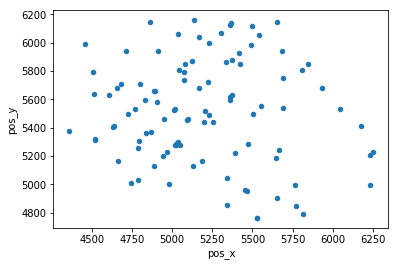

In [29]:
cc.plot.scatter('pos_x', 'pos_y')

In [30]:
label_0.groupby(['sub_label']).size()

sub_label
0      57
1      35
2      36
3      68
4      28
5      38
6      23
7      89
8      44
9      21
10    106
11      6
12     22
13     26
14     20
15     11
16     14
17     40
18     45
19     42
20     21
21     15
22     55
23     14
24     32
25     19
26     37
27     25
28     18
29     48
     ... 
70     39
71     31
72      6
73     13
74     14
75     29
76     36
77     22
78     19
79     24
80     31
81     18
82     28
83     11
84     24
85     10
86     19
87     25
88     19
89     22
90      6
91     23
92     33
93     26
94     22
95     16
96     59
97     22
98     14
99     27
Length: 100, dtype: int64

In [34]:
label_0[label_0['sub_label']==29]

,event,match_id,team_id,player,timestamp,pos_x,pos_y,label,sub_label
101457,DOTA_COMBATLOG_GET_DAMAGE,2500632973,2,herochaosknight,1910,5489.0,5745.0,0,29
183986,DOTA_COMBATLOG_KILL,2500694760,2,heroinvoker,1823,5383.0,5895.0,0,29
183987,DOTA_COMBATLOG_KILL,2500694760,2,heroinvoker,1823,5383.0,5895.0,0,29
183988,DOTA_COMBATLOG_MAKE_DAMAGE,2500694760,2,heroinvoker,1823,5383.0,5895.0,0,29
183991,DOTA_COMBATLOG_MAKE_DAMAGE,2500694760,2,heroinvoker,1824,5410.0,5922.0,0,29
183992,DOTA_COMBATLOG_MAKE_DAMAGE,2500694760,2,heroinvoker,1824,5410.0,5922.0,0,29
183993,DOTA_COMBATLOG_MAKE_DAMAGE,2500694760,2,heroinvoker,1824,5410.0,5922.0,0,29
228023,DOTA_COMBATLOG_MAKE_DAMAGE,2500724300,2,herophantomassassin,1903,5354.0,5866.0,0,29
228026,DOTA_COMBATLOG_KILL,2500724300,2,herophantomassassin,1903,5354.0,5866.0,0,29
228027,DOTA_COMBATLOG_MAKE_DAMAGE,2500724300,2,herophantomassassin,1903,5354.0,5866.0,0,29
